In [3]:
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt
from skimage import io
from scipy.signal import find_peaks
from scipy.signal import argrelmin, argrelmax

In [4]:
import cv2

In [2]:
elementsx = np.load("usaf_image_analysis/elementsx4.npy", allow_pickle=True)
elementsy = np.load("usaf_image_analysis/elementsy4.npy", allow_pickle=True)

In [5]:
gray_image = imread("usaf_image_analysis/new_148µs-3.bmp.bmp").astype(np.uint8)

In [106]:
gray_image = imread("usaf_image_analysis/new_Jade-Bl2k8-80µs-2.bmp.bmp").astype(np.uint8)

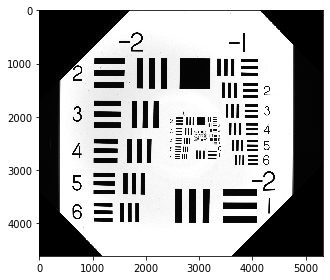

In [6]:
io.imshow(gray_image)
plt.show()

In [7]:
## Width of 1 line in micrometers in USAF Resolving Power Test Target 1951
## source: https://en.wikipedia.org/wiki/1951_USAF_resolution_test_chart
W = np.array(
    [[2000.00, 1000.00, 500.00, 250.00, 125.00, 62.50, 31.25, 15.63, 7.81, 3.91, 1.95, 0.98],\
     [1781.80, 890.90,  445.45, 222.72, 111.36, 55.68, 27.84, 13.92, 6.96, 3.48, 1.74, 0.87],\
     [1587.40, 793.70,  396.85, 198.43, 99.21,  49.61, 24.80, 12.40, 6.20, 3.10, 1.55, 0.78],\
     [1414.21, 707.11,  353.55, 176.78, 88.39,  44.19, 22.10, 11.05, 5.52, 2.76, 1.38, 0.69],\
     [1259.92, 629.96,  314.98, 157.49, 78.75,  39.37, 19.69, 9.84,  4.92, 2.46, 1.23, 0.62],\
     [1122.46, 561.23,  280.62, 140.31, 70.15,  35.08, 17.54, 8.77,  4.38, 2.19, 1.10, 0.55]])

LP = np.array(
    [0.250, 0.281, 0.315, 0.354, 0.397, 0.445,\
     0.500, 0.561, 0.630, 0.707, 0.794, 0.891,\
     1.00, 1.12, 1.26, 1.41, 1.59, 1.78,\
     2.00, 2.24, 2.52, 2.83, 3.17, 3.56,\
     4.00, 4.49, 5.04, 5.66, 6.35, 7.13,\
     8.00, 8.98, 10.08, 11.31, 12.70, 14.25])
# W = dict(zip([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], W.T))

In [44]:
def approx_contrast(image):
    # get index of middle row
    mid_row = image.shape[0]//2
    # width is 3
    map_center, mip_center, min_peaks, max_peaks = approx_contrast_by_row(image, mid_row)
    y = image[mid_row]
    x = [x for x in range(len(y))]
    plt.plot(max_peaks, y[max_peaks], "x", color='red')
    plt.plot(min_peaks, y[min_peaks], "x", color='red')
    plt.plot(x, y)
    plt.show()

    map_bot, mip_bot, _, _ = approx_contrast_by_row(image, mid_row + 1)
    map_top, mip_top, _, _ = approx_contrast_by_row(image, mid_row - 1)
    map_mean = (map_center + map_bot + map_top - 
                mip_center - mip_bot - mip_top) / (map_center + 
                map_bot + map_top + 
                mip_center + mip_bot + mip_top)
    print('Contrast (3 rows): ', map_mean)
    return(map_mean)

def approx_contrast_by_row(image, row):
    y = image[row]
    
    # hardcoded distance: adapt if no. of local minima/maxima is unequal 3
    min_dist = len(y)//4
    max_peaks, _ = find_peaks(y, height=0, distance=min_dist)
    # discard 4th local maxima
    if len(max_peaks) == 4:
        max_peaks = max_peaks[:-1]
#     plt.plot(max_peaks, y[max_peaks], "x", color='red')
    
    # now the same thing for local minima
    min_peaks, _ = find_peaks(-y, height=0, distance=min_dist)
    
    if len(min_peaks) == 4:
        min_peaks = min_peaks[:-1]
#     plt.plot(min_peaks, y[min_peaks], "x", color='red')
#     print("local maxima: ", max_peaks)
#     print("local minima: ", min_peaks)
    sum_map = sum([y[x] for x in max_peaks])
    sum_mip = sum([y[x] for x in min_peaks])
#     print("sum max: ", sum_map)
#     print("sum min: ", sum_mip)
#     print("percentage: ", (sum_map - sum_mip) / (sum_map + sum_mip))

#     x = [x for x in range(len(y))]
#     plt.plot(x, y)
#     plt.show()
    return sum_map, sum_mip, max_peaks, min_peaks

In [48]:
def print_contrast(elements):
    f, axes = None, [[None] * len(elements)] * 2
    analysis = []
    contrasts = []

    for (score, (x, y), n), ax0, ax1 in zip(elementsx, axes[0], axes[1]):
        gray_roi = gray_image[y:y + n, x:x + n]
        io.imshow(gray_roi)
        plt.show()
        contrasts.append(approx_contrast(gray_roi))
    
    print(contrasts)
    print(len(contrasts))
    
    plt.plot(LP[:len(contrasts)], contrasts)
    plt.show()
#     y = gray_roi[gray_roi.shape[0]//2]
    
#     # hardcoded distance: adapt if no. if local minima/maxima is unequal 3
#     min_dist = len(y)//4
#     max_peaks, _ = find_peaks(y, height=0, distance=min_dist)
#     # discard 4th local maxima
#     if len(max_peaks) == 4:
#         max_peaks = max_peaks[:-1]
#     plt.plot(max_peaks, y[max_peaks], "x", color='red')
    
#     # now the same thing for local minima
#     min_peaks, _ = find_peaks(-y, height=0, distance=min_dist)
#     plt.plot(min_peaks, y[min_peaks], "x", color='red')
#     print("local maxima: ", max_peaks)
#     print("local minima: ", min_peaks)

#     x = [x for x in range(len(y))]
#     plt.plot(x, y)
#     plt.show()

    


In [14]:
def template(n):
    """Generate a template image of three horizontal bars, n x n pixels

    NB the bars occupy the central square of the template, with a margin
    equal to one bar all around.  There are 3 bars and 2 spaces between,
    so bars are m=n/7 wide.

    returns: n x n numpy array, uint8
    """
    n = int(n)
    template = np.ones((n, n), dtype=np.uint8)
    template *= 255

    for i in range(3):
        template[n // 7:-n // 7, (1 + 2 * i) * n // 7:(2 + 2 * i) * n // 7] = 0
    return template


def find_elements(image,
                  template_fn=template,
                  scale_increment=1.02,
                  n_scales=300,
                  return_all=True):
    """Use a multi-scale template match to find groups of 3 bars in the image.

    We return a list of tuples, (score, (x,y), size) for each match.

    image: a 2D uint8 numpy array in which to search
    template_fn: a function to generate a square uint8 array, which takes one
        argument n that specifies the side length of the square.
    scale_increment: the factor by which the template size is increased each
        iteration.  Should be a floating point number a little bigger than 1.0
    n_scales: the number of sizes searched.  The largest size is half the image
        size.

    """
    matches = []
    # print(image.shape)
    # print(image.shape[0])
    print("NP.LOG SHAPE: ", np.log(image.shape[0] / 2))
    print("LOG SCALE INCR: ", np.log(scale_increment))
    start = np.log(image.shape[0] / 2) / np.log(scale_increment) - n_scales
    print("RES: ", start)
    print("Searching for targets", end='')
    for nf in np.logspace(start, start + n_scales, base=scale_increment):
        if nf < 24:  # There's no point bothering with tiny boxes...
            continue
        print(nf)
        templ = template(nf)  # NB n is rounded down from nf
        #io.imshow(templ)
        #plt.show()
        res = cv2.matchTemplate(image, templ, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        matches.append((max_val, max_loc, templ.shape[0]))
        # Draw a rectangle around the matched region.
        w, h = templ.shape[::-1]
        print(w, h)
        pt = min_loc
        cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), 255, 5)
 
        # Show the final image with the matched area.
        #cv2.imshow('Detected',image)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        print((max_val, max_loc, templ.shape[0]))
        print('.', end='')
    print("done")


    # Take the matches at different scales and filter out the good ones
    scores = np.array([m[0] for m in matches])
    #threshold_score = (scores.max() + scores.min()) / 2
    threshold_score = (scores.max() + scores.min()) / 2
    filtered_matches = [m for m in matches if m[0] > threshold_score]
    # filtered_matches = matches

    # Group overlapping matches together, and pick the best one
    def overlap1d(x1, n1, x2, n2):
        """Return the overlapping length of two 1d regions

        Draw four positions, indicating the edges of the regions (i.e. x1,
        c1+n1, x2, x2+n2).  The smallest distance between a starting edge (x1
        or x2) and a stopping edge (x+n) gives the overlap.  This will be
        one of the four values in the min().  The overlap can't be <0, so if
        the minimum is negative, return zero.
        """
        return max(min(x1 + n1 - x2, x2 + n2 - x1, n1, n2), 0)

    unique_matches = []
    while len(filtered_matches) > 0:
        current_group = []
        new_matches = [filtered_matches.pop()]
        while len(new_matches) > 0:
            current_group += new_matches
            new_matches = []
            for m1 in filtered_matches:
                for m2 in current_group:
                    s1, (x1, y1), n1 = m1
                    s2, (x2, y2), n2 = m2
                    overlap = (overlap1d(x1, n1, x2, n2) *
                               overlap1d(y1, n1, y2, n2))
                    if overlap > 0.5 * min(n1, n2) ** 2:
                        new_matches.append(m1)
                        filtered_matches.remove(m1)
                        break
        # Now we should have current_group full of overlapping matches.  Pick
        # the best one.
        best_score_index = np.argmax([m[0] for m in current_group])
        unique_matches.append(current_group[best_score_index])

    elements = unique_matches
    if return_all:
        return elements, matches
    else:
        return elements

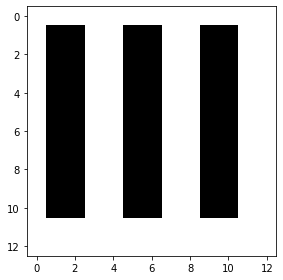

In [139]:
template(9)
io.imshow(template(13))
plt.show()

In [15]:
a, b = find_elements(gray_image, return_all=True)

NP.LOG SHAPE:  7.742402021815782
LOG SCALE INCR:  0.01980262729617973
RES:  90.97852552673282
Searching for targets25.95854224463816
25 25
(0.7292446494102478, (3078, 2265), 25)
.29.30450655803663
29 29
(0.8019671440124512, (3076, 2263), 29)
.33.081753841065236
33 33
(0.5673714876174927, (3074, 2263), 33)
.37.34587494361677
37 37
(0.5419546961784363, (2972, 2354), 37)
.42.15962617958209
42 42
(0.5592187643051147, (2996, 2264), 42)
.47.59385292982416
47 47
(0.5875808596611023, (3032, 2262), 47)
.53.72853229431048
53 53
(0.5357016921043396, (3029, 2259), 53)
.60.65395013841815
60 60
(0.5597008466720581, (3191, 2395), 60)
.68.4720298563468
68 68
(0.6040938496589661, (3194, 2315), 68)
.77.29783240743623
77 77
(0.9328943490982056, (3189, 2309), 77)
.87.26124970186311
87 87
(0.9514605402946472, (3172, 2217), 87)
.98.5089162577652
98 98
(0.9508784413337708, (3151, 2113), 98)
.111.20636726421083
111 111


KeyboardInterrupt: 

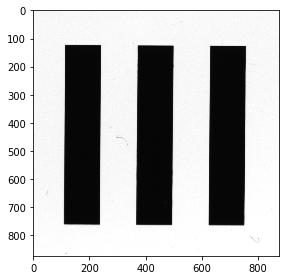

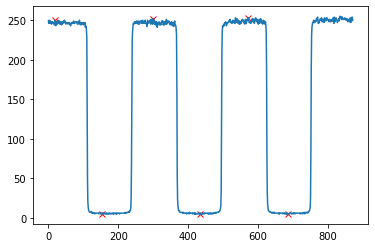

Contrast (3 rows):  0.9610558199913457


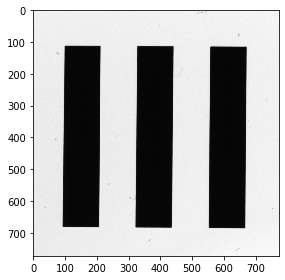

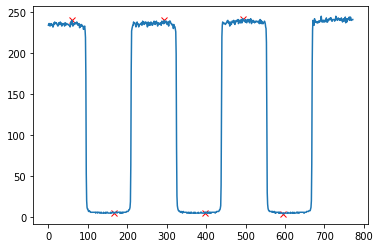

Contrast (3 rows):  0.9602349751468595


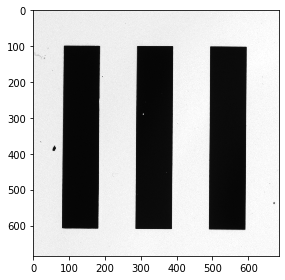

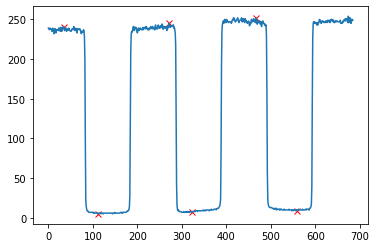

Contrast (3 rows):  0.9428822495606327


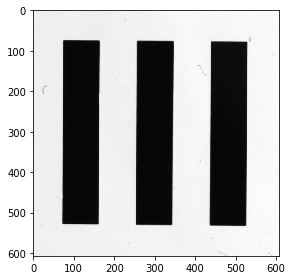

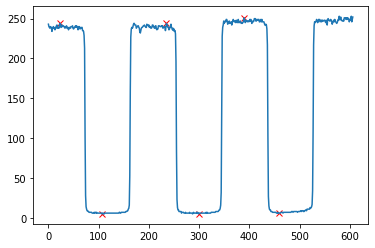

Contrast (3 rows):  0.956771063078959


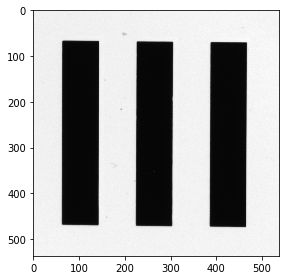

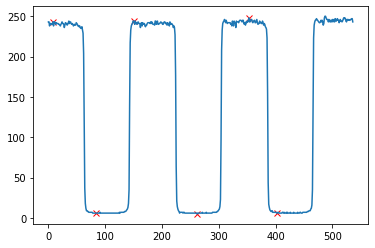

Contrast (3 rows):  0.9566371681415929


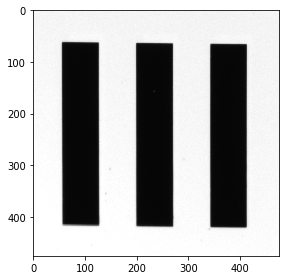

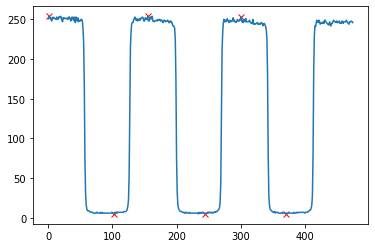

Contrast (3 rows):  0.9604980678402748


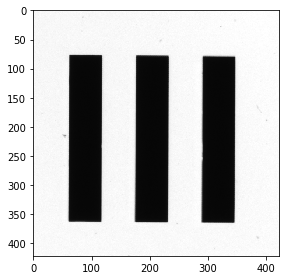

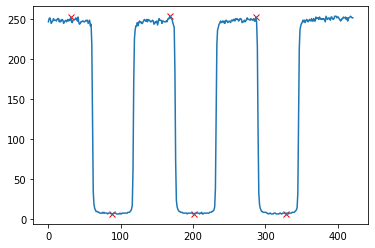

Contrast (3 rows):  0.9545259545259546


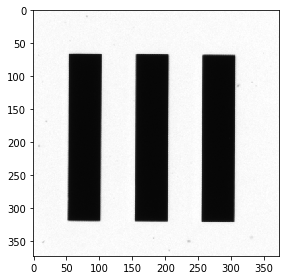

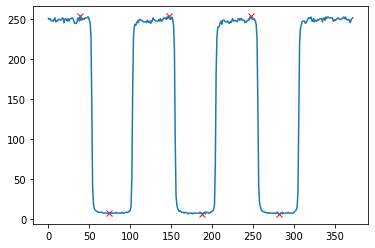

Contrast (3 rows):  0.9529914529914529


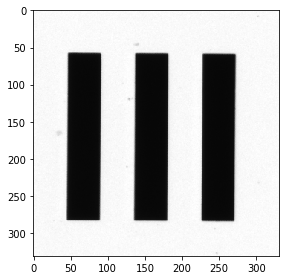

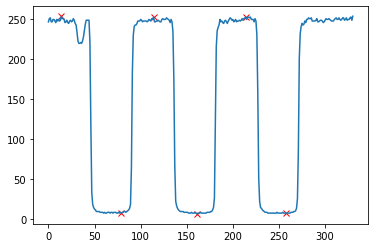

Contrast (3 rows):  0.9494646680942184


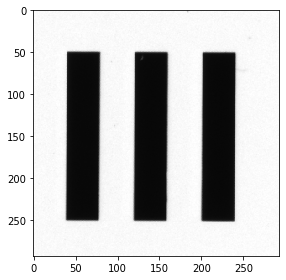

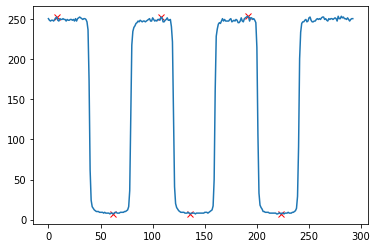

Contrast (3 rows):  0.9455087271179226


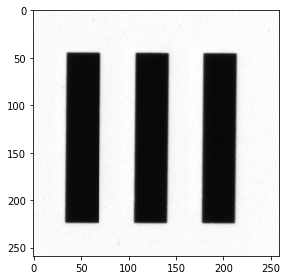

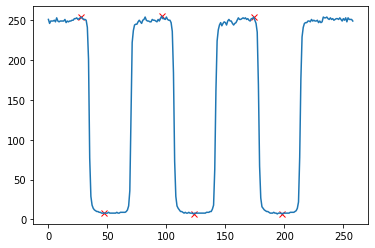

Contrast (3 rows):  0.9439252336448598


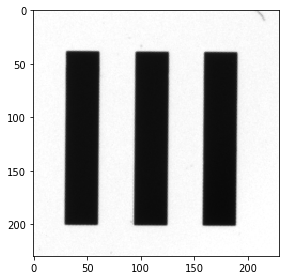

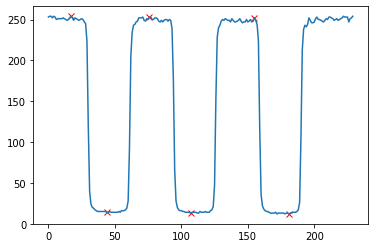

Contrast (3 rows):  0.902418682235196


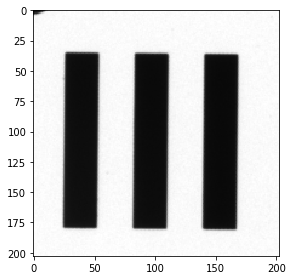

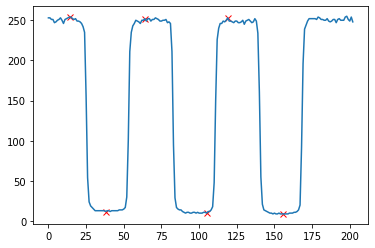

Contrast (3 rows):  0.9222316145393068


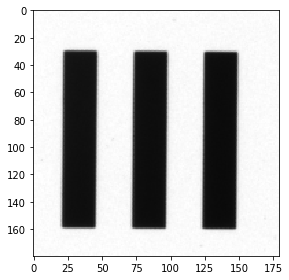

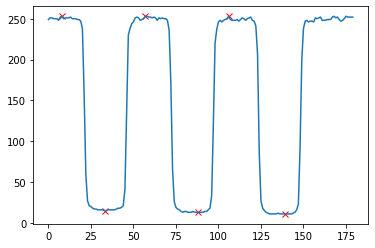

Contrast (3 rows):  0.9055973266499582


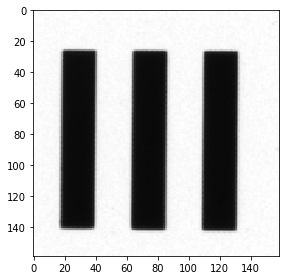

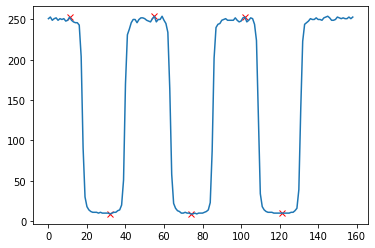

Contrast (3 rows):  0.9280270956816258


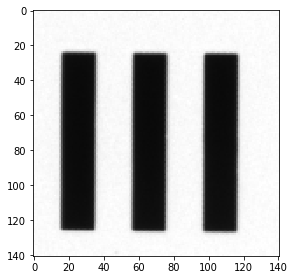

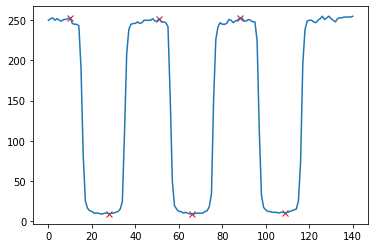

Contrast (3 rows):  0.9286321155480034


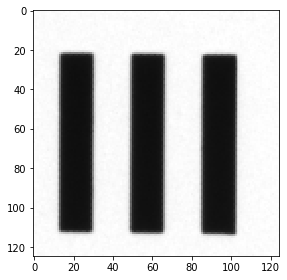

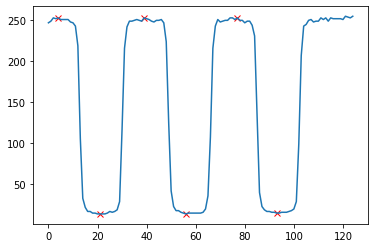

Contrast (3 rows):  0.8913313977602655


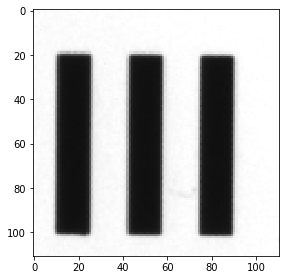

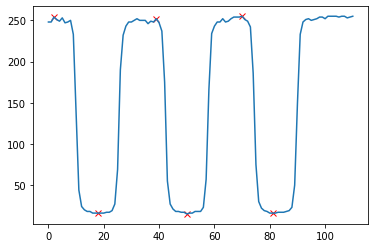

Contrast (3 rows):  0.8834710743801653


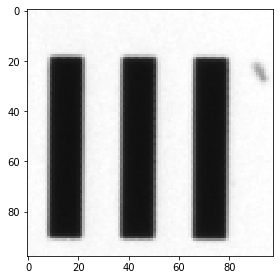

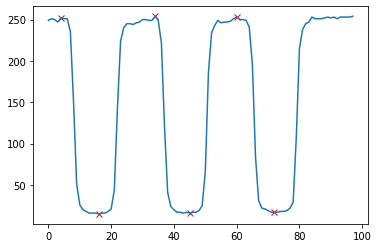

Contrast (3 rows):  0.8792390405293631


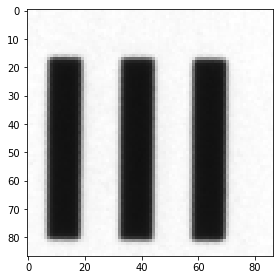

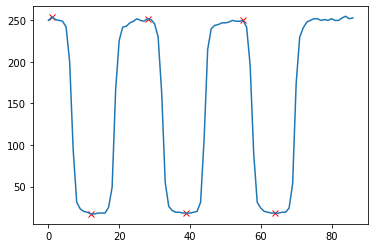

Contrast (3 rows):  0.8711808422791082


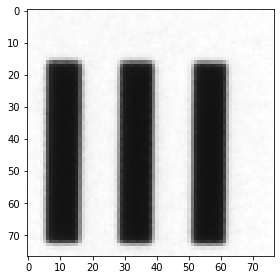

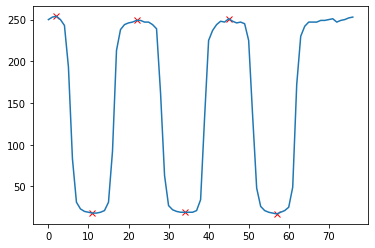

Contrast (3 rows):  0.868595041322314


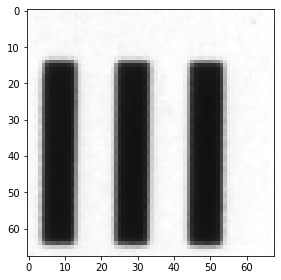

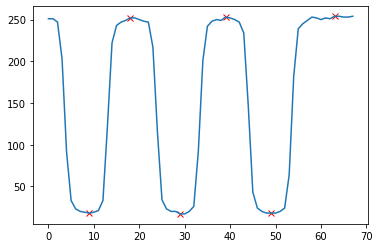

Contrast (3 rows):  0.868421052631579


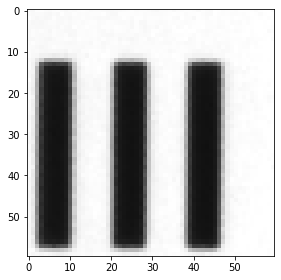

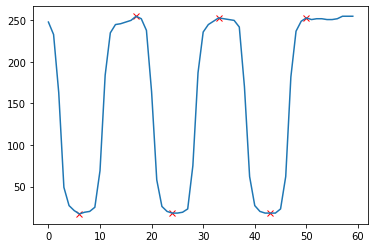

Contrast (3 rows):  0.8686910135412392


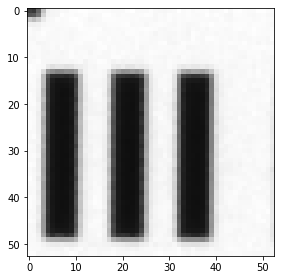

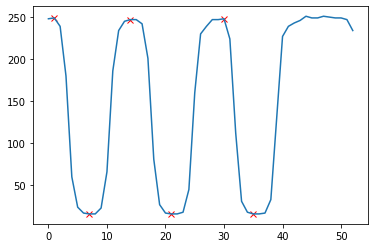

Contrast (3 rows):  0.8821548821548821


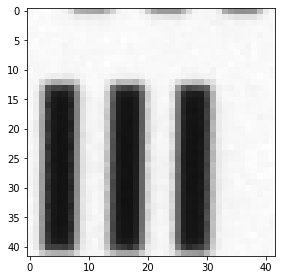

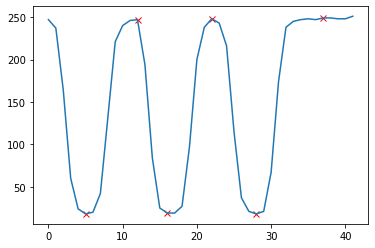

Contrast (3 rows):  0.8627615062761507


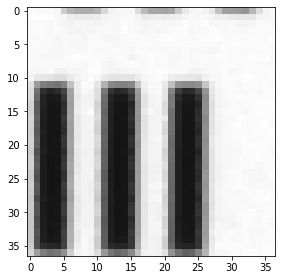

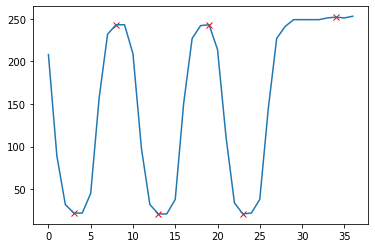

Contrast (3 rows):  0.8431535269709544


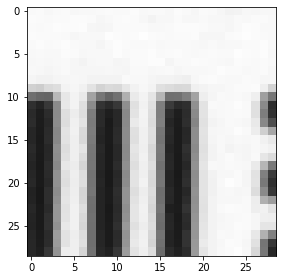

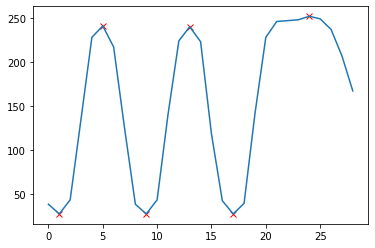

Contrast (3 rows):  0.8003286770747741


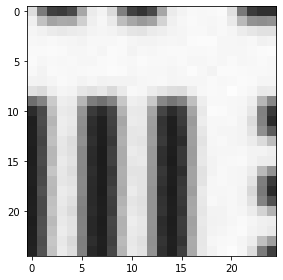

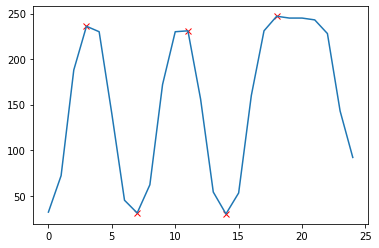

Contrast (3 rows):  0.8402747960498068


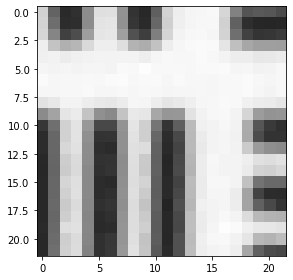

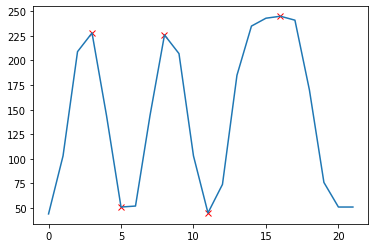

Contrast (3 rows):  0.746044962531224


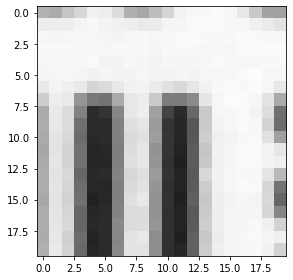

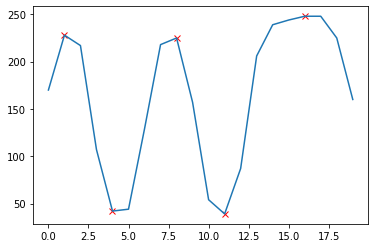

Contrast (3 rows):  0.800339847068819
[0.9610558199913457, 0.9602349751468595, 0.9428822495606327, 0.956771063078959, 0.9566371681415929, 0.9604980678402748, 0.9545259545259546, 0.9529914529914529, 0.9494646680942184, 0.9455087271179226, 0.9439252336448598, 0.902418682235196, 0.9222316145393068, 0.9055973266499582, 0.9280270956816258, 0.9286321155480034, 0.8913313977602655, 0.8834710743801653, 0.8792390405293631, 0.8711808422791082, 0.868595041322314, 0.868421052631579, 0.8686910135412392, 0.8821548821548821, 0.8627615062761507, 0.8431535269709544, 0.8003286770747741, 0.8402747960498068, 0.746044962531224, 0.800339847068819]
30


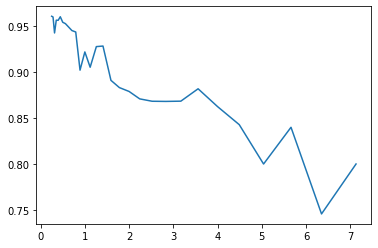

In [49]:
print_contrast(a)